# Algerian Forest Fires Dataset Project EDA Part

## 1. UNDERSTANDING THE GIVEN TASK

Task Given by instructor Krish Naik

* Solve in ipynb:
1. Import the dataset. https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
2. Do proper EDA(analysis) of your dataset and create a report
3. Then perform necessary preprocessing steps


## 2.Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

* The period from June 2012 to September 2012.
* The dataset includes 11 attribues and 1 output attribue (class)
* The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

## 3.Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
* Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
* FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€



In [1]:
## importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
## Reading columns
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [4]:
## Reading first 5 rows
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
## Reading last 5 columns
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [6]:
## Information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Insights
* There are 13 columns in this dataset
* There are 246 rows in this dataset
* The datatype of all the columns is Object

In [7]:
## Checking null columns in the data
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [8]:
# Columns which has null values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


## Insights
* There is null data in each column

In [9]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [10]:
## Checking duplicated
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


## Insights
* There are no duplicate data in the dataset

In [11]:
## Remove null or na values rows
df =df.dropna().reset_index(drop=True) 
df.shape

(244, 15)

In [12]:
## column which has string
df.iloc[122]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Region                   2
Name: 122, dtype: object

In [13]:
df=df.drop(122).reset_index(drop=True)

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [15]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
242,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2


In [16]:
## Checking columns
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [17]:
## Changing datatype
df[['month', 'day', 'year', 'Temperature',' RH', ' Ws']] = df[['month', 'day', 'year', 'Temperature',' RH', ' Ws']].astype(int)

In [18]:
df[['Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [19]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

<AxesSubplot: >

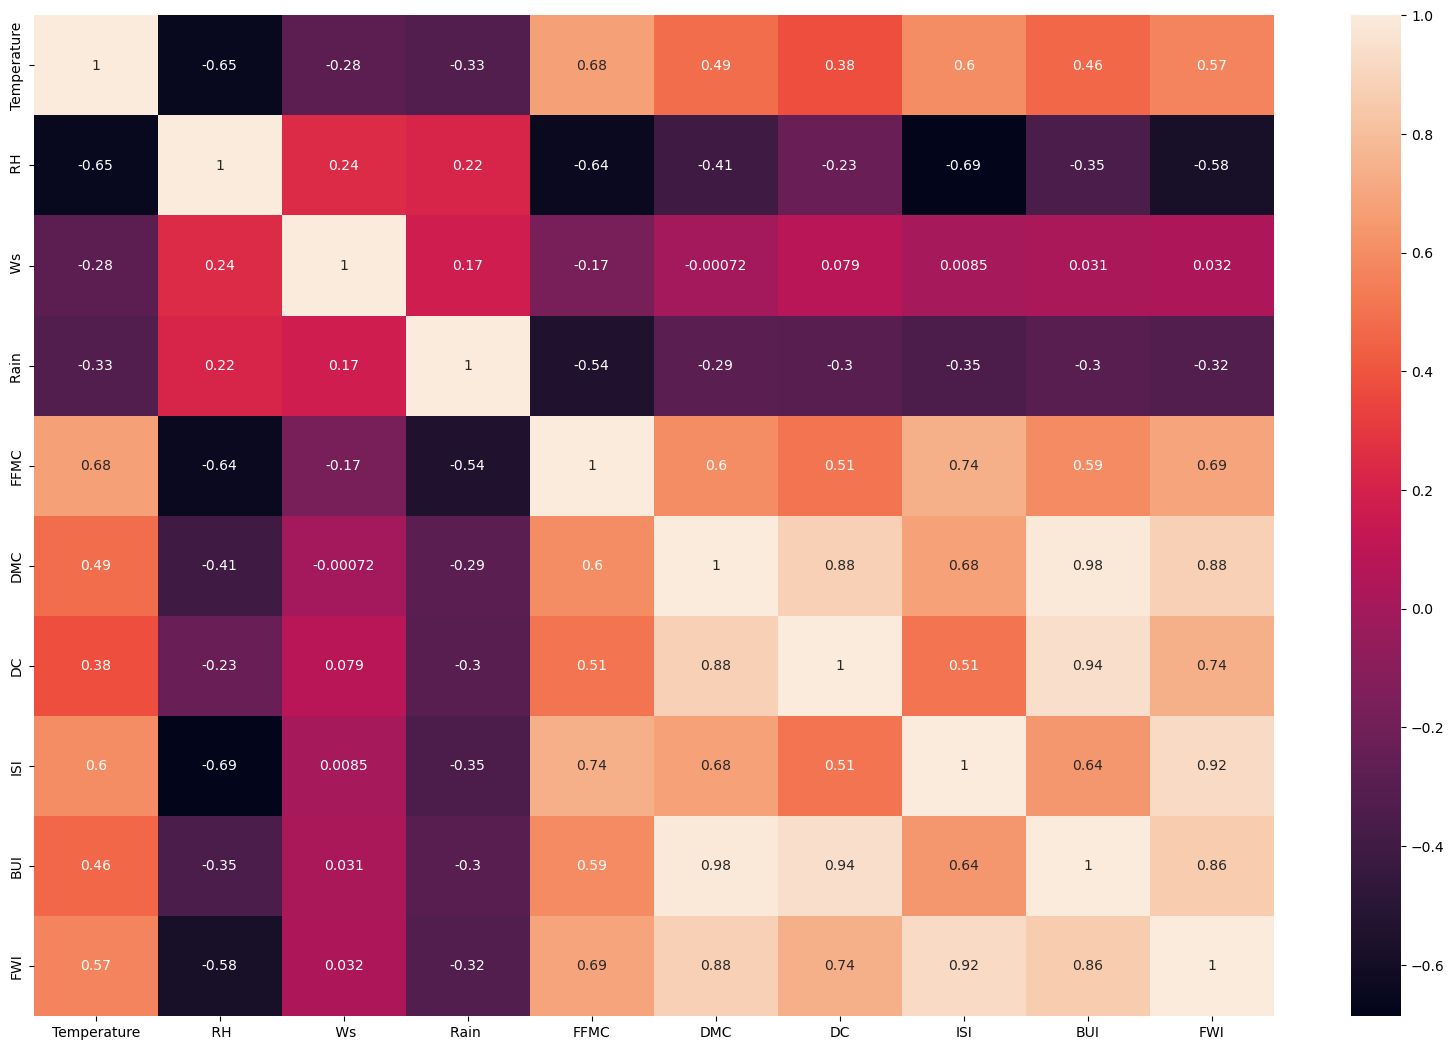

In [20]:
plt.figure(figsize=(20,13))
sns.heatmap(df[['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']].corr(),annot=True)

In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [22]:
#Dividing the dataset in 2 datsets each for 1 region.
df1=df[:122]
df2=df[122:]

In [23]:
df1.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,1


In [24]:
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2


In [35]:
#droping Year features
df1 = df.drop(['day','month','year'], axis=1)

In [37]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes  ']== 'not fire',0,1)

In [38]:
# Check counts
df1.Classes.value_counts()

1    241
0      2
Name: Classes, dtype: int64

In [41]:
pd.Categorical(df1['Classes'])

[1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1]
Length: 243
Categories (2, int64): [0, 1]